## Fraud Challenge

The goal of this notebook is to analyze the data from fraud.csv and, from it, understand how do the columns relate in order to classify a transaction as a fraud (1) or no (0).

So the ultimate goal is to maximize the Recall value for our classifiers, so that we minimize the occurences of false negatives, the worst error, in this scenario, because it would allow a fraud to happen.

### Importing Libs

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import compress
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.combine import SMOTEENN

## Data Preprocessing

Loading the dataset.

In [2]:
raw_data = pd.read_csv('fraud.csv')

print(raw_data.shape)

raw_data.head()

(150000, 31)


,Occurrence,PP1,PP2,PP3,PP4,PP5,PP6,PP7,PP8,PP9,...,PP21,PP22,PP23,PP24,PP25,PP26,PP27,PP28,Withdrawal,Fraud
0,-44299.0,-1.239996,0.985194,-1.005080,0.251323,0.872854,-1.677811,1.451311,-0.478908,-0.009459,...,0.387768,0.286200,0.128686,1.280392,-0.301116,-0.673309,-0.069611,-0.009597,-28.38,0
1,-44300.0,-0.472690,1.869177,-0.277741,1.122846,1.526166,0.262325,0.242333,-0.006108,-1.659659,...,-0.387745,-0.434629,0.512801,-0.110994,-0.350975,-0.073826,0.035071,-0.080140,-407.00,0
2,-44301.0,0.277314,3.455314,-0.722444,-0.428284,2.512025,-0.540760,0.345111,-0.013655,-0.233508,...,-0.630255,-0.388096,0.697177,-0.523084,-0.069830,0.196482,0.052145,-0.166683,-800.00,0
3,-44301.0,-1.061770,-0.105481,-0.226711,-0.929524,-0.100625,-0.300173,0.029912,-0.205934,0.233190,...,-0.147422,-0.426827,0.070413,0.283090,-0.487739,0.288220,-0.035644,-0.007305,-31.28,0
4,-44302.0,4.622715,2.621667,0.872085,0.374010,1.456021,-1.531875,-0.162837,-1.331547,-0.340639,...,0.221196,0.804017,1.309062,1.505088,0.260178,-0.861611,-0.130562,1.023781,-522.16,0


Checking for null data.

In [3]:
raw_data.isna().sum()

Occurrence    0
PP1           0
PP2           0
PP3           0
PP4           0
PP5           0
PP6           0
PP7           0
PP8           0
PP9           0
PP10          0
PP11          0
PP12          0
PP13          0
PP14          0
PP15          0
PP16          0
PP17          0
PP18          0
PP19          0
PP20          0
PP21          0
PP22          0
PP23          0
PP24          0
PP25          0
PP26          0
PP27          0
PP28          0
Withdrawal    0
Fraud         0
dtype: int64

Check the behavior, such as standard deviaton.

In [4]:
raw_data.describe()

,Occurrence,PP1,PP2,PP3,PP4,PP5,PP6,PP7,PP8,PP9,...,PP21,PP22,PP23,PP24,PP25,PP26,PP27,PP28,Withdrawal,Fraud
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,-84550.214580,0.058999,-0.000790,-0.192183,-0.037416,0.061588,-0.025715,0.026695,-0.004257,0.028148,...,0.009957,0.027398,0.007275,-0.002739,-0.035211,-0.001127,-0.000535,-0.001028,-88.602261,0.001580
std,27710.748503,1.894453,1.623712,1.406053,1.397615,1.341265,1.310820,1.194923,1.205874,1.106154,...,0.739429,0.707714,0.622620,0.606964,0.506130,0.483787,0.397662,0.307684,247.302373,0.039718
min,-133236.000000,-2.454930,-22.057729,-9.382558,-16.875344,-32.911462,-21.307738,-31.527244,-16.635979,-15.594995,...,-27.202839,-10.503090,-19.002942,-4.022866,-7.519589,-3.220178,-12.152401,-22.620072,-19656.530000,0.000000
25%,-115169.000000,-1.243456,-0.802149,-1.138473,-0.812624,-0.526469,-0.424574,-0.527260,-0.340863,-0.565387,...,-0.165038,-0.466423,-0.128298,-0.431560,-0.369398,-0.247606,-0.090965,-0.078861,-77.662500,0.000000
50%,-77502.500000,0.042647,-0.082193,-0.359076,-0.039549,0.124219,0.245177,-0.013129,-0.037083,0.095975,...,0.033794,0.014600,0.020008,-0.049357,-0.071030,0.057265,-0.004792,-0.016759,-22.040000,0.000000
75%,-61713.750000,0.952018,0.588600,0.555060,0.816575,0.751890,0.734024,0.564334,0.193112,0.678488,...,0.225362,0.540801,0.164620,0.348762,0.274183,0.331361,0.068544,0.048427,-5.410000,0.000000
max,-44299.000000,36.802320,63.344698,33.680984,5.683171,31.356750,21.929312,43.557242,73.216718,13.434066,...,34.830382,10.933144,44.807735,2.824849,10.295397,2.604551,22.565679,11.710896,-0.000000,1.000000


Showing the number os occurences per fraud classification, expliciting the unbalance.

In [5]:
raw_data[['Occurrence', 'Fraud']].groupby(by='Fraud').count()

,Occurrence
Fraud,
0,149763
1,237


In [6]:
x, y = raw_data.drop(['Occurrence','Fraud'], axis=1), raw_data[['Fraud']]

In [7]:
scaler = MinMaxScaler()

x = pd.DataFrame(scaler.fit_transform(x))

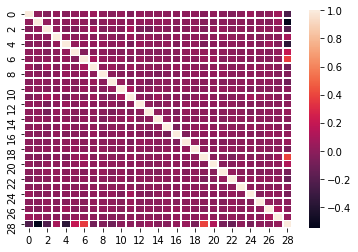

In [8]:
corr = x.corr()

ax = sns.heatmap(corr, linewidth=0.5)
plt.show()

Splitting the data in a stratified way, so that there is no risk of nos set ending up with zero fraud occurrences.

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, stratify=y)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(105000, 29) (45000, 29) (105000, 1) (45000, 1)


## Tests

Function that will be used to run and print metrics for a given model

In [10]:
def run_and_show_results(model, x_test, y_test):
    pred = model.predict(x_test)
    matrix = confusion_matrix(y_test, pred, labels=[0, 1])
    
    f1 = round(f1_score(y_test, pred), 5)
    precision = round(precision_score(y_test, pred), 5)
    recall = round(recall_score(y_test, pred), 5)
    accuracy = round(accuracy_score(y_test, pred), 5)
    roc_auc = round(roc_auc_score(y_test, pred), 5)

    print(f'F1: \t\t{f1} \nPrecision: \t{precision} \nRecall: \t{recall} \nAccuracy: \t{accuracy} \nROC_AUC: \t{roc_auc} \n')

    ConfusionMatrixDisplay(matrix, [0, 1]).plot()
    plt.show()

Testing the Logistic Regression

F1: 		0.65455 
Precision: 	0.92308 
Recall: 	0.50704 
Accuracy: 	0.99916 
ROC_AUC: 	0.75349 



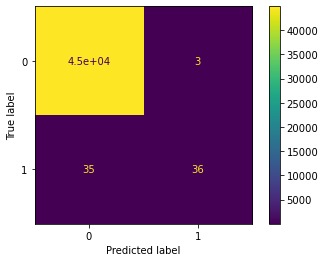

In [11]:
lr = LogisticRegression(solver='lbfgs', max_iter=1000)

lr.fit(x_train, y_train.values.ravel())

run_and_show_results(lr, x_test, y_test)

Testing the Random Forest

F1: 		0.77165 
Precision: 	0.875 
Recall: 	0.69014 
Accuracy: 	0.99936 
ROC_AUC: 	0.84499 



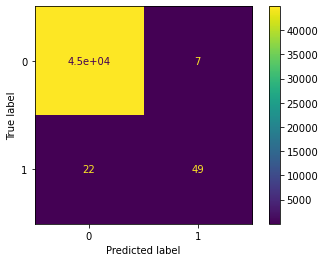

In [12]:
rf = RandomForestClassifier(n_estimators=10, max_depth=5)

rf.fit(x_train, y_train.values.ravel())

run_and_show_results(rf, x_test, y_test)

## Using Recursive Feature Elimination

Trying to see if it is possible to use less columns in our classifier, so that we can get better results than the ones above.

In [13]:
def select_best_features(model, x_train, y_train, x_test):
    selector = RFECV(model, cv=5)
    selector = selector.fit(x_train, y_train)
    
    print(f'Selected {len(np.where(selector.support_)[0])} out of {len(selector.support_)} features.')

    x_train_rfecv = selector.transform(x_train)
    x_test_rfecv = selector.transform(x_test)
    
    return x_train_rfecv, x_test_rfecv, selector.support_

Selected 8 out of 29 features.
F1: 		0.66055 
Precision: 	0.94737 
Recall: 	0.50704 
Accuracy: 	0.99918 
ROC_AUC: 	0.7535 



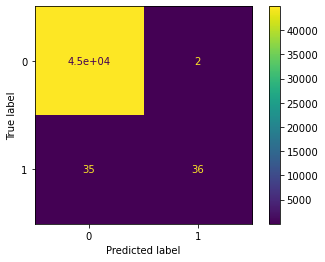

In [14]:
lr_rfecv = LogisticRegression(solver='lbfgs', max_iter=1000)

x_train_rfecv, x_test_rfecv, columns_lr = select_best_features(lr_rfecv, x_train, y_train.values.ravel(), x_test)

lr_rfecv.fit(x_train_rfecv, y_train.values.ravel())

run_and_show_results(lr_rfecv, x_test_rfecv, y_test)

Selected 11 out of 29 features.
F1: 		0.77273 
Precision: 	0.83607 
Recall: 	0.71831 
Accuracy: 	0.99933 
ROC_AUC: 	0.85904 



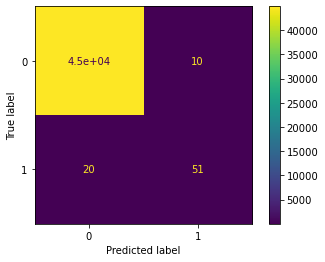

In [15]:
rf_rfecv = RandomForestClassifier(n_estimators=10, max_depth=5)

x_train_rfecv, x_test_rfecv, columns_rf = select_best_features(rf_rfecv, x_train, y_train.values.ravel(), x_test)

rf_rfecv.fit(x_train_rfecv, y_train.values.ravel())

run_and_show_results(rf_rfecv, x_test_rfecv, y_test)

Using SMOTEENN to combine oversmapling and undersampling to increase the balance of our data.

Then I'll test with the resampled test data and also with the normal (imbalanced) test data, having only fitted with resampled train data. I'm doing that in order to check if the metrics are similar in both scenarios.

In [16]:
sme = SMOTEENN()
x_res, y_res = sme.fit_resample(np.array(x), np.array(y.values.ravel()))

In [17]:
x_train_res, x_test_res, y_train_res, y_test_res = train_test_split(x_res, y_res, train_size=0.7, test_size=0.3, stratify=y_res)

print(x_train_res.shape, x_test_res.shape, y_train_res.shape, y_test_res.shape)

(209493, 29) (89783, 29) (209493,) (89783,)


F1: 		0.93544 
Precision: 	0.96899 
Recall: 	0.90414 
Accuracy: 	0.93755 
ROC_AUC: 	0.93758 



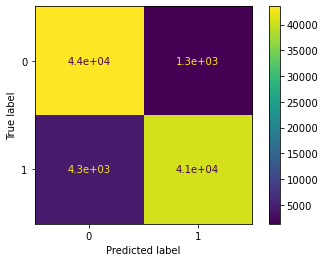

In [18]:
lr_res = LogisticRegression(solver='lbfgs', max_iter=1000)

lr_res.fit(x_train_res, y_train_res)

run_and_show_results(lr_res, x_test_res, y_test_res)

F1: 		0.08939 
Precision: 	0.04702 
Recall: 	0.90141 
Accuracy: 	0.97102 
ROC_AUC: 	0.93627 



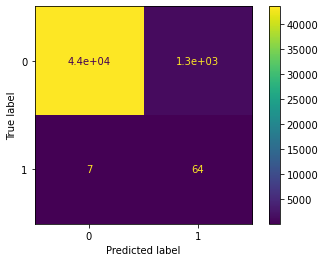

In [26]:
run_and_show_results(lr_res, x_test, y_test)

F1: 		0.93251 
Precision: 	0.99361 
Recall: 	0.8785 
Accuracy: 	0.93637 
ROC_AUC: 	0.93642 



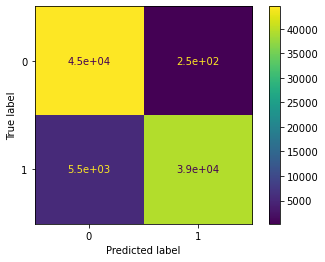

In [19]:
rf_res = RandomForestClassifier(n_estimators=10, max_depth=5)

rf_res.fit(x_train_res, y_train_res)

run_and_show_results(rf_res, x_test_res, y_test_res)

F1: 		0.26271 
Precision: 	0.15461 
Recall: 	0.87324 
Accuracy: 	0.99227 
ROC_AUC: 	0.93285 



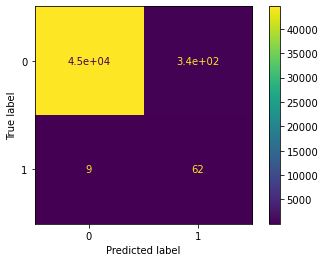

In [27]:
run_and_show_results(rf_res, x_test, y_test)

In [20]:
def select_columns_and_run(columns, model):
    x_train_res_rfecv, x_test_res_rfecv = x_train_res[:, columns], x_test_res[:, columns]
    
    model.fit(x_train_res_rfecv, y_train_res)

    run_and_show_results(model, x_test_res_rfecv, y_test_res)

Testing both models using SMOTEENN and features from previous feature selection

F1: 		0.92285 
Precision: 	0.97032 
Recall: 	0.87981 
Accuracy: 	0.92639 
ROC_AUC: 	0.92643 



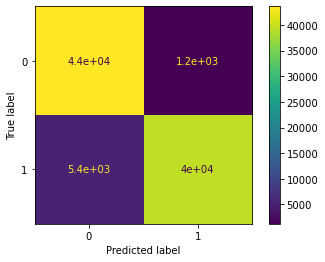

In [21]:
select_columns_and_run(columns_lr, LogisticRegression(solver='lbfgs', max_iter=1000))

F1: 		0.93091 
Precision: 	0.98187 
Recall: 	0.88497 
Accuracy: 	0.93426 
ROC_AUC: 	0.9343 



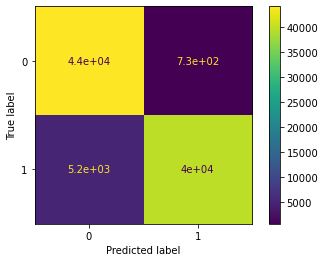

In [22]:
select_columns_and_run(columns_rf, RandomForestClassifier(n_estimators=10, max_depth=5))